#Multi Modal RAG using GPT-4o
* Text Summaries
* Image Summaries
* Context
* Reference to images
* Image as context

In [1]:
!apt-get install poppler-utils tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  poppler-utils tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 30 not upgraded.
Need to get 5,002 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.6 [186 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 5,002 kB in 1s (5,631 kB/s)
Selecting previously unselected package popp

In [2]:
! pip install -U langchain openai langchain-chroma langchain-experimental # (newest versions required for multi-modal)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 643.9/643.9 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.3/423.3 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 26.9 MB/s e

In [3]:
! pip install "unstructured[all-docs]" pillow pydantic lxml pillow matplotlib chromadb tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.1/526.1 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
!pip install huggingface_hub[hf_xet]

  Using cached hf_xet-1.0.3-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (494 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 MB 10.3 MB/s eta 0:00:00


In [2]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 27.5 MB/s eta 0:00:00


In [3]:
!pip install langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 337.1 kB/s eta 0:00:00


In [4]:
!pip install asyncio-throttle

In [ ]:
import os

# keys for the services we will use

os.environ["OPENAI_API_KEY"] = "**** YOUR OPENAI KEY HERE ****"

In [6]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from unstructured.partition.pdf import partition_pdf

In [7]:
import requests
import tempfile
#import fitz  # PyMuPDF
#import re

In [ ]:
####### BERT #######
pdf_url = 'https://arxiv.org/pdf/1810.04805'

In [ ]:
###### Attention ####
pdf_url = 'https://arxiv.org/pdf/1706.03762v7'

In [8]:
#### Resnet #####
pdf_url = 'https://arxiv.org/pdf/1512.03385'

# **INPUT- pdf url**

In [ ]:
pdf_url =''

In [9]:
import logging
logging.getLogger("pdfminer").setLevel(logging.ERROR)

In [15]:
def process_pdf_url(pdf_url, output_path="./output"):
  response = requests.get(pdf_url)
  response.raise_for_status()

  with tempfile.NamedTemporaryFile(suffix=".pdf",delete=False) as tmp_pdf:
    tmp_pdf.write(response.content)
    tmp_pdf.flush()
    pdf_path = tmp_pdf.name  # Store the file path

  chunk = partition_pdf(
      filename=pdf_path,
      infer_table_structure=True,            # extract tables
      strategy="hi_res",                     # mandatory to infer tables
      extract_image_block_types=["Image", "Table"],   # Add 'Table' to list to extract image of tables
      image_output_dir_path=output_path,   # if None, images and tables will saved in base64
      extract_image_block_to_payload=True,   # if true, will extract base64 for API usage
      chunking_strategy="by_title",          # or 'basic'
      max_characters=10000,                  # defaults to 500
      combine_text_under_n_chars=2000,       # defaults to 0
      new_after_n_chars=6000,
    # extract_images_in_pdf=True,          # deprecated
    )
  return chunk

In [16]:
%%time
chunks = process_pdf_url(pdf_url)

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

CPU times: user 58.8 s, sys: 4.41 s, total: 1min 3s
Wall time: 2min 23s


In [17]:
# separate tables from texts
tables = []
texts = []

for chunk in chunks:
    if "Table" in str(type(chunk)):
        tables.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts.append(chunk)

In [18]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

In [32]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

#display_base64_image(images[0])

### TEXT SUMMARY

In [19]:
# Generate summaries of text elements
def generate_text_summaries(texts, tables, summarize_texts=False):
    """
    Summarize text elements
    texts: List of str
    tables: List of str
    summarize_texts: Bool to summarize texts
    """

    # Prompt
    prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}

"""
    prompt = ChatPromptTemplate.from_template(prompt_text)

    # Text summary chain
    model = ChatOpenAI(temperature=0, model="gpt-4o")
    summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

    # Initialize empty summaries
    text_summaries = []
    table_summaries = []

    # Apply to text if texts are provided and summarization is requested
    if texts and summarize_texts:
        text_summaries = summarize_chain.batch(texts, {"max_concurrency": 3})
    elif texts:
        text_summaries = texts

    # Apply to tables if tables are provided
    if tables:
        table_summaries = summarize_chain.batch(tables, {"max_concurrency": 3})

    return text_summaries, table_summaries


# Get text, table summaries
text_summaries, table_summaries = generate_text_summaries(
    texts, tables, summarize_texts=True
)

### IMAGE SUMMARY

In [20]:
from langchain_openai import ChatOpenAI
import time
from tenacity import retry, wait_random_exponential, stop_after_attempt

# Retry wrapper for rate limit handling
@retry(wait=wait_random_exponential(min=1, max=5), stop=stop_after_attempt(5))
def run_chain(chain, image_base64):
    messages = [
        (
            "user",
            [
                {"type": "text", "text": prompt_template},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{image_base64}"
                    },
                },
            ],
        )
    ]
    prompt = ChatPromptTemplate.from_messages(messages)
    single_chain = prompt | ChatOpenAI(model="gpt-4o-mini") | StrOutputParser()
    return single_chain.invoke({})


# Your prompt
prompt_template = """Describe the image in detail. For context,
the image is part of a research paper and can contain important information.
Be specific about workflow diagrams or model architectures shown in image."""

# Example loop over base64-encoded images
image_summaries = []
for image in images:  # 'images' should be a list of base64-encoded JPEG strings
    try:
        summary = run_chain(chain=None, image_base64=image)
        image_summaries.append(summary)
    except Exception as e:
        print(f"Error processing image: {e}")
        #image_summaries.append("Error in processing.")

In [21]:
import asyncio
from asyncio_throttle import Throttler
from langchain_openai import ChatOpenAI
import nest_asyncio
import time

# Prompt template
prompt_template = """Describe the image in detail. For context,
the image is part of a research paper and can contain important information.
Be specific about workflow diagrams or model architectures shown in image."""

# Token-safe throttler (e.g., 10 requests/sec, adjust if needed)
throttler = Throttler(rate_limit=10, period=1.0)  # 10 per second

async def describe_image_async(image_base64: str, model="gpt-4o-mini") -> str:
    async with throttler:
        prompt = ChatPromptTemplate.from_messages([
            (
                "user",
                [
                    {"type": "text", "text": prompt_template},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{image_base64}"
                        },
                    },
                ],
            )
        ])
        chain = prompt | ChatOpenAI(model=model) | StrOutputParser()
        return await chain.ainvoke({})

async def process_images_async(images):
    tasks = [describe_image_async(img) for img in images]
    return await asyncio.gather(*tasks, return_exceptions=True)

nest_asyncio.apply()  # Allow nested event loops in Jupyter

image_summaries = await process_images_async(images)

### RAG

In [22]:
import uuid
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
from langchain.embeddings import OpenAIEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever

# The vectorstore to use to index the child chunks
vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())

# The storage layer for the parent documents
store = InMemoryStore()
id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

<ipython-input-22-acdcec3e4a1a>:9: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())
<ipython-input-22-acdcec3e4a1a>:9: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())


In [23]:
# Add texts
doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))

# Add tables
if tables:
  table_ids = [str(uuid.uuid4()) for _ in tables]
  summary_tables = [
    Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
                    ]
  retriever.vectorstore.add_documents(summary_tables)
  retriever.docstore.mset(list(zip(table_ids, tables)))

# Add image summaries
if images:
  img_ids = [str(uuid.uuid4()) for _ in images]
  summary_img = [
    Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
                  ]
  retriever.vectorstore.add_documents(summary_img)
  retriever.docstore.mset(list(zip(img_ids, images)))

In [ ]:
'''
# Retrieve
docs = retriever.invoke(
    "who are the authors of the paper?"
)
print(len(docs))
for doc in docs:
    print(str(doc) + "\n\n" + "-" * 80)

In [24]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_openai import ChatOpenAI
from base64 import b64decode


def parse_docs(docs):
    """Split base64-encoded images and texts"""
    b64 = []
    text = []
    for doc in docs:
        try:
            b64decode(doc)
            b64.append(doc)
        except Exception as e:
            text.append(doc)
    return {"images": b64, "texts": text}


def build_prompt(kwargs):

    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            context_text += text_element.text

    # construct prompt with context (including images)
    prompt_template = f"""
    You are an AI assistant helping understand and summarize a research paper. Use both text and image references to answer.

    Answer the question based only on the following context, which can include text, tables. Please make sure to include all relevant images in your answer.

    Do not include references until asked.
    Context: {context_text}
    Question: {user_question}

    INSTRUCTIONS:
    - If you see image references, treat them as important visual context.
    - If an image is referenced (e.g. `[IMAGE REFERENCE: ...]`), assume it's related to diagrams, plots, or tables.
    - Provide figure number in of image reference
    -  Refer to abstarct and conclusion to summarize the document.
    - Answer the question clearly, referencing images where helpful.

    """

    prompt_content = [{"type": "text", "text": prompt_template}]

    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )


chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | ChatOpenAI(model="gpt-4o")
    | StrOutputParser()
)

chain_with_sources = {
    "context": retriever | RunnableLambda(parse_docs),
    "question": RunnablePassthrough(),
} | RunnablePassthrough().assign(
    response=(
        RunnableLambda(build_prompt)
        | ChatOpenAI(model="gpt-4o")
        | StrOutputParser()
    )
)

In [29]:
import re
def find_next_ints_after_figure(text):
    # Find all words following the word "figure"
    matches = re.findall(r'\bfigure\b\s+(\w+)', text, flags=re.IGNORECASE)

    # Try converting each match to an integer, skip if it fails
    result = []
    for match in matches:
        try:
            result.append(int(match))
        except ValueError:
            continue
        lst = list(set(result))
        result = lst
    return result


#**Query**

Response: The residual block architecture, as discussed in the context, uses a specific approach to learning residual functions as opposed to trying to approximate a desired mapping directly. A building block of this residual architecture is visually shown in **Figure 2**, which is a crucial image for understanding this concept.

Formally, the residual block is defined by the equation:

\[ y = F(x, W_i) + x \]

In this equation:
- \( x \) and \( y \) are the input and output vectors of the layers being considered.
- \( F(x, W_i) \) is the residual mapping that needs to be learned. In the specific case of two-layered blocks illustrated, \( F \) is represented as \( W_2\sigma(W_1x) \), where \( \sigma \) denotes the ReLU activation function.
  
The operation \( F(x, W_i) + x \) involves a "shortcut connection" (identity mapping) that adds the input \( x \) directly to the output of the residual function \( F(x, W_i) \). This addition is performed element-wise.

If there is a mismatch in 

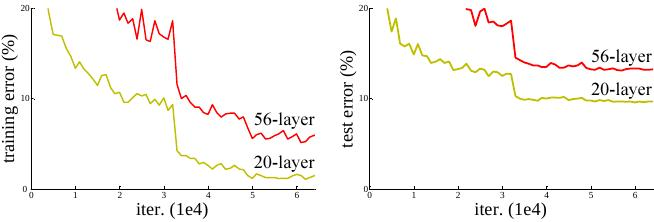


--------------------------------------------------

Figure 2


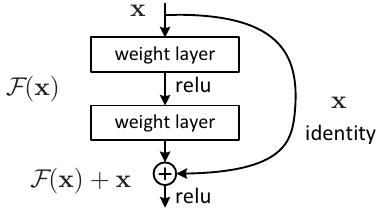


--------------------------------------------------

Figure 3


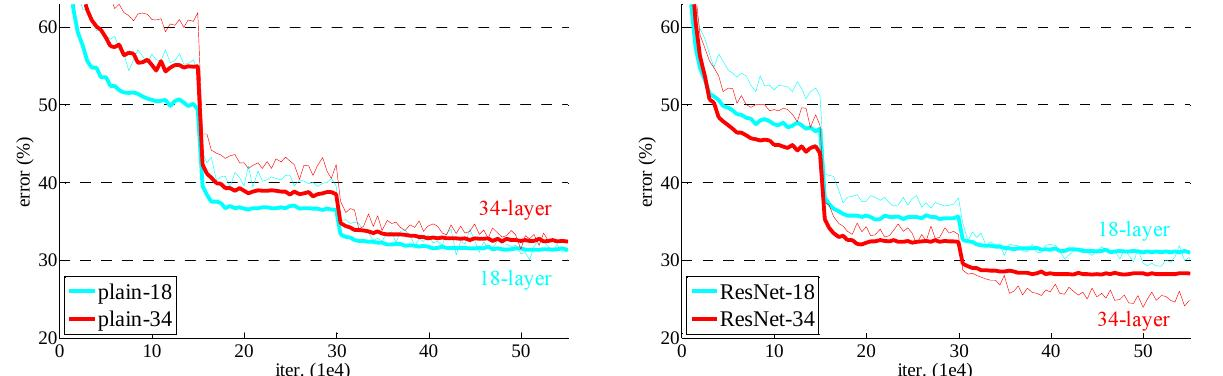


--------------------------------------------------



In [34]:
response = chain_with_sources.invoke(
    "Explain residual block architecture with formula"
)

print("Response:", response['response'])
for image in response['context']['images']:
    display_base64_image(image)
print("\n" + "-"*50 + "\n")

if len(response['context']['images']) == 0:
  paragraph = response['response']
  next_ints = find_next_ints_after_figure(paragraph)
  if len(next_ints) > 0:
    for i in next_ints:
      target_figure = f"Figure {i}"
      print(target_figure)
      display_base64_image(images[i-1])
      print("\n" + "-"*50 + "\n")
  else:
    print("No reference figure found")

In [ ]:
text_summaries[0]

'The paper discusses a new HetNet model inspired by 3GPP, using a Poisson cluster process (PCP) to better capture the spatial coupling between user and base station (BS) locations, which is not adequately represented by the traditional Poisson point process (PPP)-based K-tier HetNet model. This approach bridges the gap between 3GPP simulation models and PPP-based analytic models by modeling a fraction of users and multiple BS tiers with PCP. The study shows that the downlink coverage probability can be expressed using sum-product functionals over PPP, PCP, and its offspring point process. The model converges to the PPP-based model as cluster size increases and is applicable to Thomas and Matérn cluster processes, aligning closely with 3GPP simulation configurations.'